# Сборный проект

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до декабря 2016 года. Вам нужно выявить определяющие успешность игры закономерности. 
Сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.


In [1]:
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('/Users/knovikova/Downloads/games.csv')
    
display(games.head(20))
display(games.info())
display(games.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Общие пункты по таблице:

- Разный регистр в названиях колонок
- Пустые значения в в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating
- Следует изменить тип данных в столбцах: Year_of_Release, User_Score
- Год релиза игр в выборке от 1980 - 2016 гг.
- Странных больших/ маленьких значений не замечено

## Предобработка данных

Заменим регистр названий столбцов

In [3]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
display(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Заполним пропуски чтобы изменить тип данных в нужных столбцах.

Строки в пропусками в столбцах name, year_of_release и genre следует удалить т.к. кол-во пропусков незначительно и заменить пропуски на среднее/ноль или оставить как есть было бы некорректно.

In [4]:
games = games.dropna(subset=['name', 'year_of_release', 'genre']).reset_index()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Я думаю, что заполнять пропуски в данных Critic_Score и User_Score следует 0 т.к. обычно такая оценка формируется как среднее арифметическое по кол-ву игроков и их оценке, ноль означает, что игра еще не получила оценок пользователей.

Столбец Rating следует оставить с пустыми значениями т.к. пустое место означает, что агентство еще не сформировало рейтинг игре.

In [5]:
games[['critic_score', 'user_score']] = games[['critic_score', 'user_score']].fillna(0)
games['rating'] = games['rating'].fillna('unknown')
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  object 
 11  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


None

Изменим тип данных в столбце year_of_release с float на int т.к. в этом столбце не может быть дробных значений. 

In [6]:
games['year_of_release'] = games['year_of_release'].astype('int')

Далее, посмотрим, почему столбцы user_score и rating имеют тип данных Объект

In [7]:
display(games['user_score'].value_counts())
display(games['rating'].value_counts())

0      6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Итак, мы видим 2376 оценок tbd, обычно под этой аббревиатурой по моему опыту понимается To Be Discussed, то есть скорее всего оценка находится на уточнении т.к. возможно не собрано достаточное кол-во данных для формирование оценки

In [8]:
display(games[games['user_score']=='tbd']['jp_sales'].value_counts().sort_values())

0.26       1
0.20       1
0.14       1
0.15       1
0.86       1
0.47       1
0.31       1
0.10       1
0.17       1
0.16       2
0.11       2
0.13       2
0.12       2
0.08       2
0.25       2
0.18       2
0.09       3
0.04       5
0.06       6
0.05       7
0.02      11
0.03      11
0.01      16
0.00    2294
Name: jp_sales, dtype: int64

Перебрав столбцы датафрейма можно увидеть, что скорее всего рейтинг tbd стоит у игр, которые не смогли пока получить оценки пользователей со всех трех основных рынов сбыта: Северной Америке, Европе и Японии. В данном случае, в Японии и категории "прочие страны" у игр с рейтингом tbd мало продаж, то есть пока не собрана обратная связь от игроков.

Предлагаю заполнить tbd нулем т.к. как было принято выше, в данном датафрейме ноль в рейтинге означает его отсутствие, а не низкий рейтинг игры. 

In [9]:
games['user_score'] = games['user_score'].replace('tbd', 0)
display(games['user_score'].value_counts())

0      8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.3       2
1.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [10]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  float64
 11  rating           16444 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [11]:
games['total_sales'] = np.nan #новая колонка где будет хранится общее кол-во продаж
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
display(games.head())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38


## Исследовательский анализ данных

Рассмотрим, сколько игр выпускалось в разные годы и определим за какой период следует рассматривать данные

<AxesSubplot:xlabel='year_of_release'>

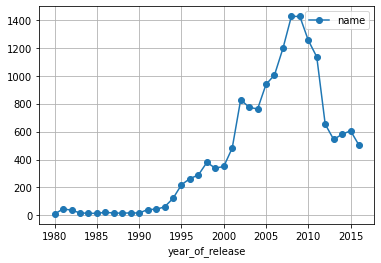

In [12]:
display(games.pivot_table(index='year_of_release',values='name', aggfunc='count').plot(style='-o',grid=True))

На данном графике мы видим, что большая часть игр выходила с 2000 года по дату выгрузки - 2016.

Рассмотрим продажи по платформам

In [13]:
display(games.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending = False).head(10))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Лидеры продаж это консоли, давайте посмотрим как у наиболее популярных платформ (PS,XBOX, Wii, Nintendo DS, PC) менялись продажи с течением времени

<AxesSubplot:title={'center':'X360_sales'}, xlabel='year_of_release'>

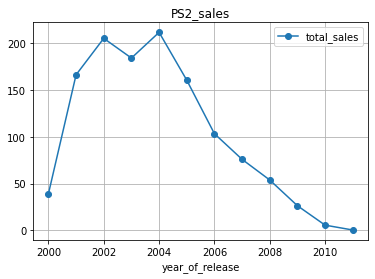

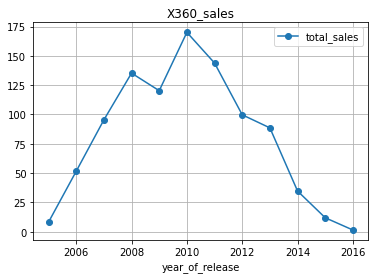

In [14]:
games[games['platform']=='PS2'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True, title='PS2_sales')
games[games['platform']=='X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True,title='X360_sales')

<AxesSubplot:xlabel='year_of_release'>

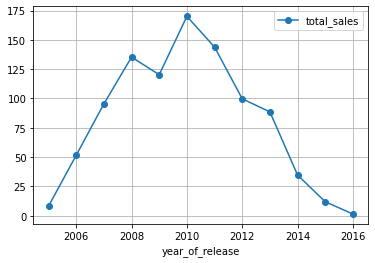

In [15]:
games[games['platform']=='X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True)

<AxesSubplot:xlabel='year_of_release'>

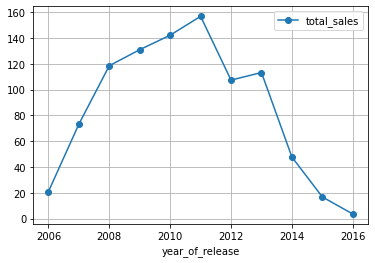

In [16]:
games[games['platform']=='PS3'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True)

<AxesSubplot:xlabel='year_of_release'>

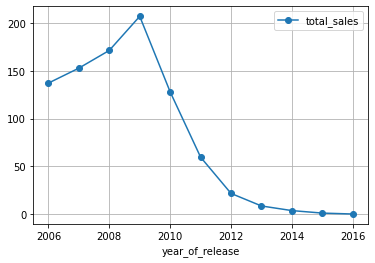

In [17]:
games[games['platform']=='Wii'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True)

На графиках мы видим, что в начале 2000х наиболее популярной платформой была PS2, но в 2005 году состоялся релиз XBOX 360 и он начал вымещать PS2 с рынка, в 2006 году вышел PS3, и продажи ранее популярной PS2 к 2010 упали до нуля.

Wii быстро рос в продажах с 2006 года, но достигнув максимума в 2009 продажи начали резко падать и к 2016 году игры на данной платформе почти никто не покупает

<AxesSubplot:xlabel='year_of_release'>

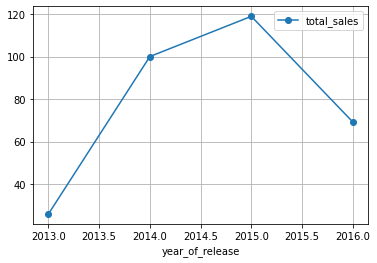

In [18]:
games[games['platform']=='PS4'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True)

Продажи XBOX 360 и PS3 к 2016 году упали практически до нуля в связи с выходом PS4, которая заместила собой предыдущие поколения консолей.

<AxesSubplot:xlabel='year_of_release'>

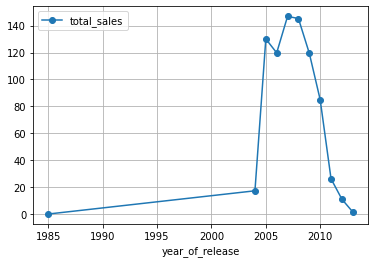

In [19]:
games[games['platform']=='DS'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True)

<AxesSubplot:xlabel='year_of_release'>

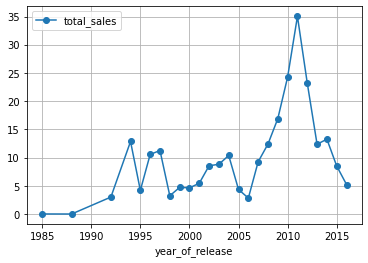

In [20]:
games[games['platform']=='PC'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(style='-o',grid=True)

У Нинтендо запуск состоялся в 2004 году на американском рынке и через год данная консоль уже продавалась по всему миру. Однако, рынок слишком быстро пресытился и новые поколения ниндендо не оживили продажи, после 2013 года продажи прекратились данных о продажах нет.

ПК является одной из главных платформ, однако на графике выше мы видим, что в целом продажи на данной платформе с 1990х годов относительно стабильны, в 2011 году наблюдается сильный всплеск продаж.

In [21]:
display(games[(games['year_of_release']==2011) & (games['platform']=='PC')].pivot_table(index='name', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10))

,total_sales
name,
The Elder Scrolls V: Skyrim,3.88
Star Wars: The Old Republic,2.97
Battlefield 3,2.78
Call of Duty: Modern Warfare 3,1.71
Football Manager 2012,1.51
Anno 2070,1.42
The Witcher 2: Assassins of Kings,0.95
Portal 2,0.75
Assassin's Creed: Revelations,0.74


Всплеск продаж произошел благодаря выходу таких очень популярных игр как The Elder Scrolls V: Skyrim, Battlefield 3, Call of Duty: Modern Warfare 3. Стоит отметить, что вторая по продажам игра Star Wars: The Old Republic вышла только для платформы PC, что также повлияло на всплеск продаж

Рассмотрим за текущий и два предыдущих периода наиболее популярные платформы.

In [22]:
display(games[games['year_of_release']==2016].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


In [23]:
display(games[games['year_of_release']==2015].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


In [24]:
display(games[games['year_of_release']==2014].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS4,100.00
XOne,54.07
PS3,47.76
3DS,43.76
X360,34.74
WiiU,22.03
PC,13.28
PSV,11.90
Wii,3.75


За последние три года продажи PS3 сильно упали, лидерство сохранили XBOX One и PS4. Платформа 3DS (Нинтендо) сильно потеряло в продажах в течение рассматриваемого периода, но в 2016 тем не менее сохранила лидерскую позицию. Платформа PC не в лидерах рейтинга, однако, показывает стабильные продажи из года в год.

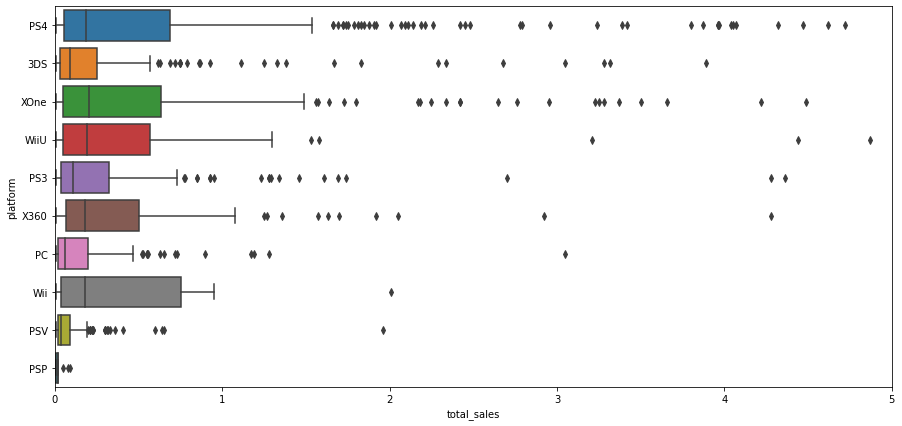

In [25]:
# код ревьюера
import seaborn as sns

plt.figure(figsize=(15, 7))

sns.boxplot(data=games[(games['year_of_release']>=2014)], x='total_sales', y='platform')

plt.xlim(0, 5)
plt.show()

На данном графике мы видим, что показатели продаж PS4 и Xbox One практически равны, у них примерно на одинаковом уровне находятся верхние границы графика и медианы, они в целом показывают самые высокие продажи, если посмотретт на часть графика, отражающую выбросы. Не уступает по величине продаж и платформа Wii и WiiU, однако у них почти нет выбросов выше ящика, то есть игры на этой платформе продаются стабильно, но больших успехов продаж игры за последние три года на этой платформе не делали. 

Слабые продажи наблюдаются на платформах PS3, PC, PCV и PSP.

Немного необычный график у Нинтендо, ящик показывает, что большинство продаж данной платформы довольно невысокие, однако, мы вдиим большое количество отдельных выбросов очень высоких продаж. То есть продажи данной платформы стабильно низкие, но игра стабильно пару раз в год выдает рекордные продажи - я насчитала порядка 20 выбросов выще ящика лидеров PS4 и XOne.

Рассмотрим зависимость уровня продаж внутри одной платформы и отзывов критиков / пользователей.

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


<AxesSubplot:title={'center':'user_score'}, xlabel='user_score', ylabel='total_sales'>

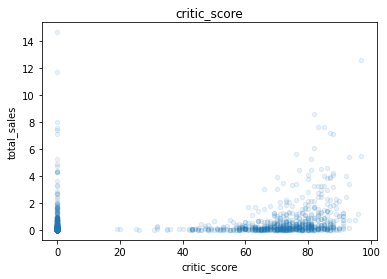

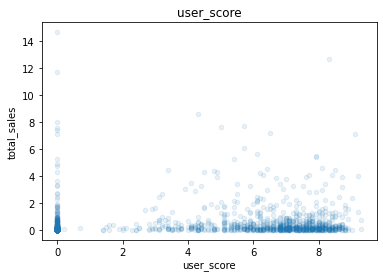

In [26]:
games = games[(games['year_of_release']==2014) + (games['year_of_release']==2015) + (games['year_of_release']==2016)]
#ограничим данные только рассматриваемым периодом

games.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.1, title='critic_score')
games.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1, title='user_score')

In [27]:
user_score = games[games['user_score']!=0][['total_sales', 'user_score']]
critic_score = games[games['critic_score']!=0][['total_sales', 'critic_score']]
display("Корреляция оценок пользователей и уровня продаж:",user_score.corr())
display("Корреляция оценок критиков и уровеня продаж:", critic_score.corr())

'Корреляция оценок пользователей и уровня продаж:'

,total_sales,user_score
total_sales,1.00000,-0.01307
user_score,-0.01307,1.00000


'Корреляция оценок критиков и уровеня продаж:'

,total_sales,critic_score
total_sales,1.000000,0.328105
critic_score,0.328105,1.000000


График рассеивания показывает, что высокому уровню продаж всегда соответстсвует высокая оценка критиков, со стороны оценок пользователей данной связи не наблюдается.

Коэффициент корреляции показывает, что связm между продажами и оценками игроков отсутствует, для критиков он равен 0.33 что говорит о том, что связь между оценками критиков и продажами игр есть, но крайне слабая. 

Давайте рассмотрим данные в разрезе основных платформ - PS,XBOX, Wii, Nintendo DS, PC

'Корреляция оценок и уровня продаж по платформе PS4:'

,critic_score,user_score,total_sales
critic_score,1.000000,0.903670,0.211837
user_score,0.903670,1.000000,0.101448
total_sales,0.211837,0.101448,1.000000


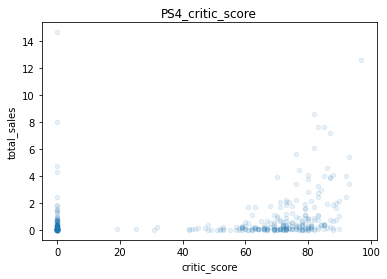

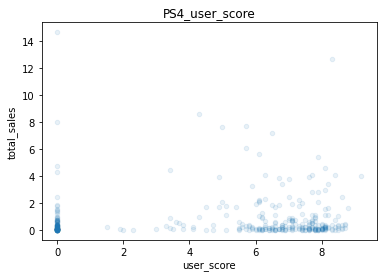

In [28]:
games[(games['platform']=='PS4')].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.1, title='PS4_critic_score')
games[(games['platform']=='PS4')].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1, title='PS4_user_score')
display("Корреляция оценок и уровня продаж по платформе PS4:",games[games['platform']=='PS4'][['critic_score', 'user_score', 'total_sales']].corr())

Данные по корреляции и графику рассеивания не отличаются от общей тенденции, рассмотренной выше

Рассмотрим данные по платформе XBOX

'Корреляция оценок и уровня продаж по платформе XBOX:'

,critic_score,user_score,total_sales
critic_score,1.000000,0.793371,0.272518
user_score,0.793371,1.000000,0.102074
total_sales,0.272518,0.102074,1.000000


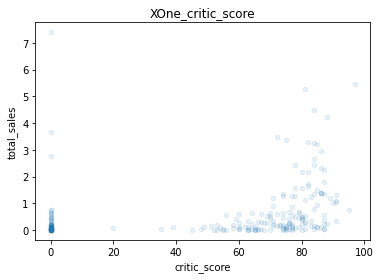

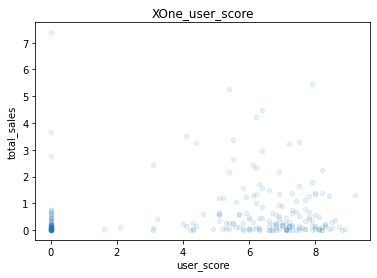

In [29]:
games[(games['platform']=='XOne')].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.1, title='XOne_critic_score')
games[(games['platform']=='XOne')].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1, title='XOne_user_score')
display("Корреляция оценок и уровня продаж по платформе XBOX:",games[games['platform']=='XOne'][['critic_score', 'user_score', 'total_sales']].corr())

Данные по корреляции и графику рассеивания не отличаются от общей тенденции, рассмотренной выше

Рассмотрим данные по платформе PC

'Корреляция оценок и уровня продаж по платформе PC:'

,critic_score,user_score,total_sales
critic_score,1.000000,0.786678,0.184312
user_score,0.786678,1.000000,0.061709
total_sales,0.184312,0.061709,1.000000


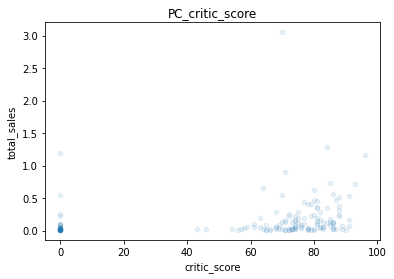

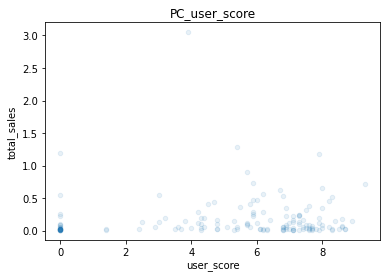

In [30]:
games[(games['platform']=='PC')].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.1, title='PC_critic_score')
games[(games['platform']=='PC')].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.1, title='PC_user_score')
display("Корреляция оценок и уровня продаж по платформе PC:",games[games['platform']=='PC'][['critic_score', 'user_score', 'total_sales']].corr())

Рассмотрим данные по платформе Nintendo

'Корреляция оценок и уровня продаж по платформе Nintendo:'

,critic_score,user_score,total_sales
critic_score,1.000000,0.887491,0.053255
user_score,0.887491,1.000000,0.054922
total_sales,0.053255,0.054922,1.000000


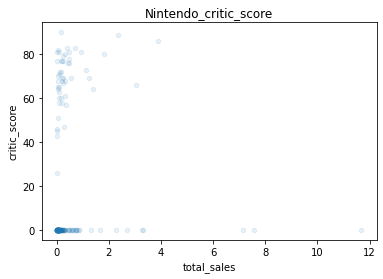

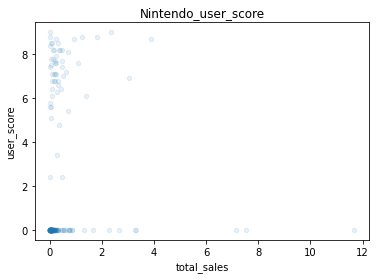

In [31]:
games[(games['platform']=='3DS')].plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.1, title='Nintendo_critic_score')
games[(games['platform']=='3DS')].plot(x='total_sales', y='user_score', kind='scatter', alpha=0.1, title='Nintendo_user_score')
display("Корреляция оценок и уровня продаж по платформе Nintendo:",games[games['platform']=='3DS'][['critic_score', 'user_score', 'total_sales']].corr())

Пользователи при покупке игры в бОльшей степени ориентируются на оценку критиков. Однако, анализ коэффициентов корреляции и диаграмм рассеивания показывает, что связь между уровнем продаж и высотой оценки критиков / пользователей прямая, но в целом несущественная. Таким образом, брать оценку пользователей/критиков для дальнейшего анализа и прогнозирования уровня продаж игр не следует. 

Рассмотрим динамику и уровень продаж в разрезе жанров.

In [32]:
genre_pivot = games.pivot_table(index='genre', values = 'total_sales', aggfunc=['sum', 'count', 'mean'])
genre_pivot.columns = ['sum', 'count', 'mean']
display(genre_pivot.sort_values(by='mean', ascending=False))

,sum,count,mean
genre,,,
Shooter,170.94,128,1.335469
Sports,109.48,161,0.680000
Platform,18.09,38,0.476053
Fighting,28.22,60,0.470333
Role-Playing,101.44,221,0.459005
Racing,27.52,69,0.398841
Misc,37.55,113,0.332301
Action,199.36,619,0.322068
Simulation,13.13,44,0.298409


Наиболее высокие продажи наблюдаются у жанров Action, Shooter, Sports и Role-playing. Самые низкие продажи у жанров Strategy и Puzzle

Наиболее высокие продажи на одну игру приносят жанры Shooter, Sports, Platform, Fighting и Role-playing. 

Определим портрет пользователя для каждого из трех регионов продаж.

Рассмотрим Северную Америку.

In [33]:
display("Самые популярные платформы в Северной Америке",games.pivot_table(index='platform', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending=False).head())

'Самые популярные платформы в Северной Америке'

,na_sales
platform,
XOne,0.356447
WiiU,0.265205
PS4,0.262261
X360,0.254955
Wii,0.189091


In [34]:
display("Самые популярные жанры в Северной Америке",games.pivot_table(index='genre', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending=False).head())

'Самые популярные жанры в Северной Америке'

,na_sales
genre,
Shooter,0.617344
Sports,0.286522
Fighting,0.207167
Platform,0.178684
Role-Playing,0.151448


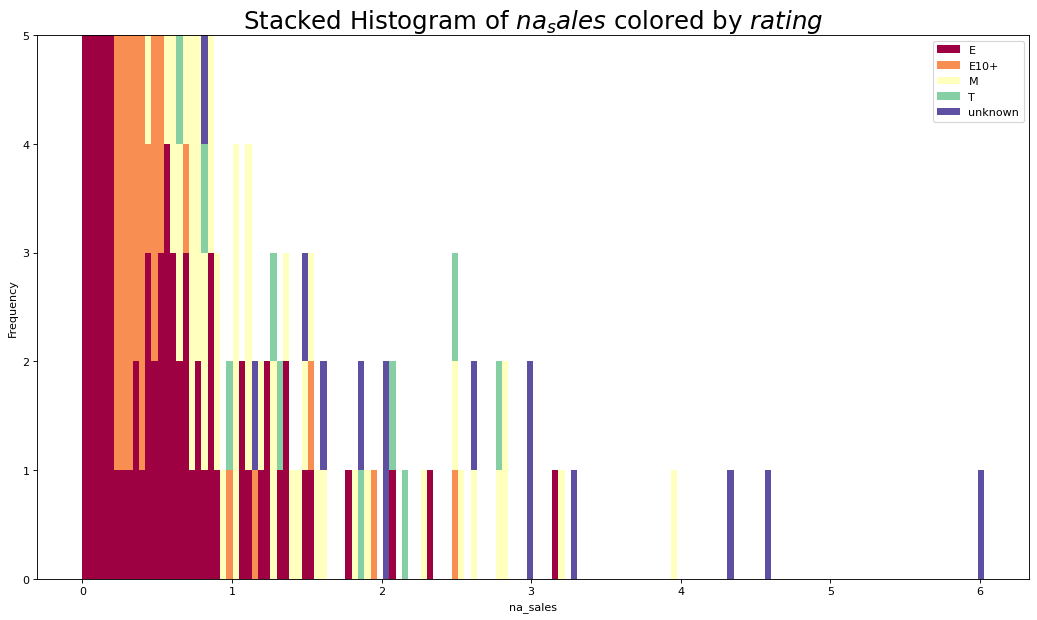

In [36]:
x_var = 'na_sales'
groupby_var = 'rating'
games_loc = games.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [games[x_var].values.tolist() for i, games in games_loc]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, games[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(games[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 5)
# plt.xticks(ticks=bins, labels=np.unique(games[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

In [35]:
display('Влияние рейтинга ESRB на продажи в Северной Америке',games.pivot_table(index='rating', values='na_sales', aggfunc='sum'))

'Влияние рейтинга ESRB на продажи в Северной Америке'

,na_sales
rating,
E,50.74
E10+,33.23
M,96.42
T,38.95
unknown,64.72


Рассмотрим регион Европа

In [37]:
display("Самые популярные платформы в Европе",games.pivot_table(index='platform', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending=False).head())

'Самые популярные платформы в Европе'

,eu_sales
platform,
PS4,0.345851
Wii,0.235455
XOne,0.202851
WiiU,0.180137
X360,0.139550


In [38]:
display("Самые популярные жанры в Европе",games.pivot_table(index='genre', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending=False).head())

'Самые популярные жанры в Европе'

,eu_sales
genre,
Shooter,0.511875
Sports,0.284037
Racing,0.204783
Platform,0.178947
Simulation,0.165909


In [39]:
display('Влияние рейтинга ESRB на продажи в Европе',games.pivot_table(index='rating', values='eu_sales', aggfunc='sum'))

'Влияние рейтинга ESRB на продажи в Европе'

,eu_sales
rating,
E,58.06
E10+,26.16
M,93.44
T,34.07
unknown,58.95


Рассмотрим регион Япония

In [40]:
display("Самые популярные платформы в Японии",games.pivot_table(index='platform', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending=False).head())

'Самые популярные платформы в Японии'

,jp_sales
platform,
3DS,0.208679
WiiU,0.100137
PS3,0.051233
PSV,0.049288
PS4,0.039947


In [41]:
display("Самые популярные жанры в Японии",games.pivot_table(index='genre', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending=False).head())

'Самые популярные жанры в Японии'

,jp_sales
genre,
Role-Playing,0.140995
Fighting,0.106167
Platform,0.070789
Puzzle,0.066429
Simulation,0.052500


In [42]:
display('Влияние рейтинга ESRB на продажи в Японии',games.pivot_table(index='rating', values='jp_sales', aggfunc='sum'))

'Влияние рейтинга ESRB на продажи в Японии'

,jp_sales
rating,
E,8.94
E10+,4.46
M,8.01
T,14.78
unknown,56.90


Попробуем описать портрет каждого региона.

Для Северной Америки наиболее предпочтительными являются игры на платформе PS4 и XOne жанра шутер. Скорее всего этот пользователь предпочитает игры более высокого возрастного рейтинга - M (для этого рейтинга различные жестокие сцены и рекомендуется для людей старше 17 лет). Но я бы не стала предполагать, что типичный игрок Северной Америки это взрослый совершеннолетний человек т.к. возрастное ограничение рейтинга является рекомендацией и никак не остановит игроков младше 17 лет поиграть в игру рейтинга M. Мы скорее можем сделать вывод, что в данном регионе предпочитают довольно жестокие игры, связанные с насилием (это же показывает наиболее популярный жанр шутер)

Для игроков Европы наиболее предпочтительными также являются игры на платформе PS4 и XOne жанра шутер. Игры рейтинга М также являются наиболее продаваемыми. Можно сделать вывод, что портреты игроков Северной Америки и Европы очень схожи.

В Японии лучше всего продаются игры на платформе Нинтендо жанров файтинг или рпг. При этом, наибольшей популярность пользуются игры жанра T (для подростков, где возрастное ограничение от 13 лет). То что наиболее предпочитаемый рейтинг игр в Японии ниже, чем в Северной Америке и Европе скорее напрямую связано с особенностями предпочитаемых жанров. Файтингам и рпг в целом реже присваивают высокие рейтинги, по сравнению с шутерами. 

## Проверка гипотез

Необходимо проверить следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Первую гипотезу можно сформулировать следующим образом:
- Н0 Средние пользовательские рейтинги платформ Xbox One и PC равны
- Н1 Средние пользовательские рейтинги платформ Xbox One и PC не равны
    
Вторую гипотезу сформулируем следующим образом:
- Н0 Средние пользовательские рейтинги жанров Action и Sports равны
- Н1 Средние пользовательские рейтинги жанров Action и Sports не равны

In [44]:
#соберем необходимые срезы данных для проверок гипотез 
xbox_sales = games[(games['platform']=='XOne') & (games['user_score']!=0)]['user_score']
pc_sales = games[(games['platform']=='PC') & (games['user_score']!=0)]['user_score']
action_sales = games[(games['genre']=='Action') & (games['user_score']!=0)]['user_score']
sports_sales = games[(games['genre']=='Sports') & (games['user_score']!=0)]['user_score']

In [45]:
alpha = 0.05
results = st.ttest_ind(
    xbox_sales, 
    pc_sales)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


То есть пользовательские оценки игр на платформах XBOX One и PC скорее всего равны.

In [46]:
alpha = 0.05
results = st.ttest_ind(
    action_sales, 
    sports_sales)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


То есть пользовательские оценки игр жанров Action и Sports не равны.

## Общий вывод

Наиболее успешная игра должна покрывать три основные платфромы XBOX, PS и PC. Причем игра для консолей должна быть для последней версии консоли, в 2017 году это будут XBOX One и PS4.

Наиболее доходные рынки - Северная Америка и Европа, у них примерно одинаковые предпочтения в играх - это шутеры на консолях с высоким возрастным рейтингом. Шутеры имеют самый высокий уровень продаж на одну игру (1.3) то есть на каждая игра этого жанра в среднем продает 1 300 тыс. копий, что намного больше, чем любой другой жанр. Следующими в рейтинге по средним продажам копий на одну игру идут платформеры и спорт. Следует также обратить внимание на файтинги т.к. они популярны в Северной Америке и в Японии.

В Японии иные предпочтения, игроки данной страны в основном играют в рпг и файтинги, к тому же предпочтения отдаются не слишком жестоким играм.

Таким образом, при планировании рекламной кампании для Северной Америки и Европы следует отслеживать анонсы шутеров от наиболее крупных игровых компаний, а также игр про спорт и платформеры. Важно, чтобы эти игры выходили на консолях XBOX и PS последнего поколения. Для Японии следует сделать акцент на рпг и файтинги, причем важно, чтобы помимо двух наиболее популярных консолей, игра была доступна также на Нинтендо. Кроме того, отзывы критиков и самих игроков почти не влияют на продажи, так что резать показы рекламы игры с невысоким рейтингом от критиков не стоит, скорее всего, это почти не повлияет на продажи. 